In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)



# Loading the dataset (Bangalore)

In [418]:
df1 = pd.read_csv("C:\\Users\\Asus\\Desktop\\banglore3final.csv")
df1.head()
df3=df1.copy()


In [422]:

# List of columns to drop
columns_to_drop = [
    'tenantsPreference', 'water_status', 'possesionby', 'power_status', 
    'property_typ', 'psnstats', 'seller_type', 'no_balconies', 
    'parking', 'flooring_typ', 'fur_unfur', 'house_facing', 'lat', 'lon','city' , 'main_charges'
]

# Drop the specified columns from df2
df3.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
df3.head()


,actualprice,amenities,auto_des,bedrooms,booking_amt,covAreaUnit,landmarks,locality,sqftprice
0,28764288,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Budigere...",NaN,NaN,NaN,"Channasandra Main Road, Nagondanahalli",NaN,NaN
1,28240000,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Devanaha...",NaN,NaN,NaN,"Channasandra Main Road, Nagondanahalli",NaN,NaN
2,12500000,"Town House,Large Clubhouse ,Air Conditioned,La...","3 BHK, Villa is available for Sale in Kanakapu...",NaN,NaN,NaN,"Channasandra Main Road, Nagondanahalli",NaN,NaN
3,27295824,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Sarjapur...",NaN,NaN,NaN,"Channasandra Main Road, Nagondanahalli",NaN,NaN
4,17351475,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Whitefie...",NaN,NaN,NaN,"Channasandra Main Road, Nagondanahalli",NaN,NaN


In [424]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   actualprice  10320 non-null  int64  
 1   amenities    9037 non-null   object 
 2   auto_des     10320 non-null  object 
 3   bedrooms     4322 non-null   float64
 4   booking_amt  4272 non-null   float64
 5   covAreaUnit  5479 non-null   float64
 6   landmarks    10320 non-null  object 
 7   locality     5441 non-null   object 
 8   sqftprice    4269 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 725.8+ KB


In [432]:
df3.describe()

,actualprice,bedrooms,booking_amt,covAreaUnit,sqftprice
count,1.032000e+04,4322.000000,4.272000e+03,5479.000000,4269.000000
mean,2.883452e+07,3.974086,5.744223e+05,2748.469429,9280.848677
std,2.097275e+07,0.181980,5.940767e+05,1541.704056,1684.619940
min,1.000000e+05,2.000000,1.000000e+04,350.000000,4838.000000
25%,1.610000e+07,4.000000,5.000000e+05,2300.000000,8862.000000
50%,2.650000e+07,4.000000,5.000000e+05,2500.000000,8862.000000
75%,3.250000e+07,4.000000,5.000000e+05,3000.000000,9339.000000
max,7.500000e+08,4.000000,8.650520e+06,64000.000000,36000.000000


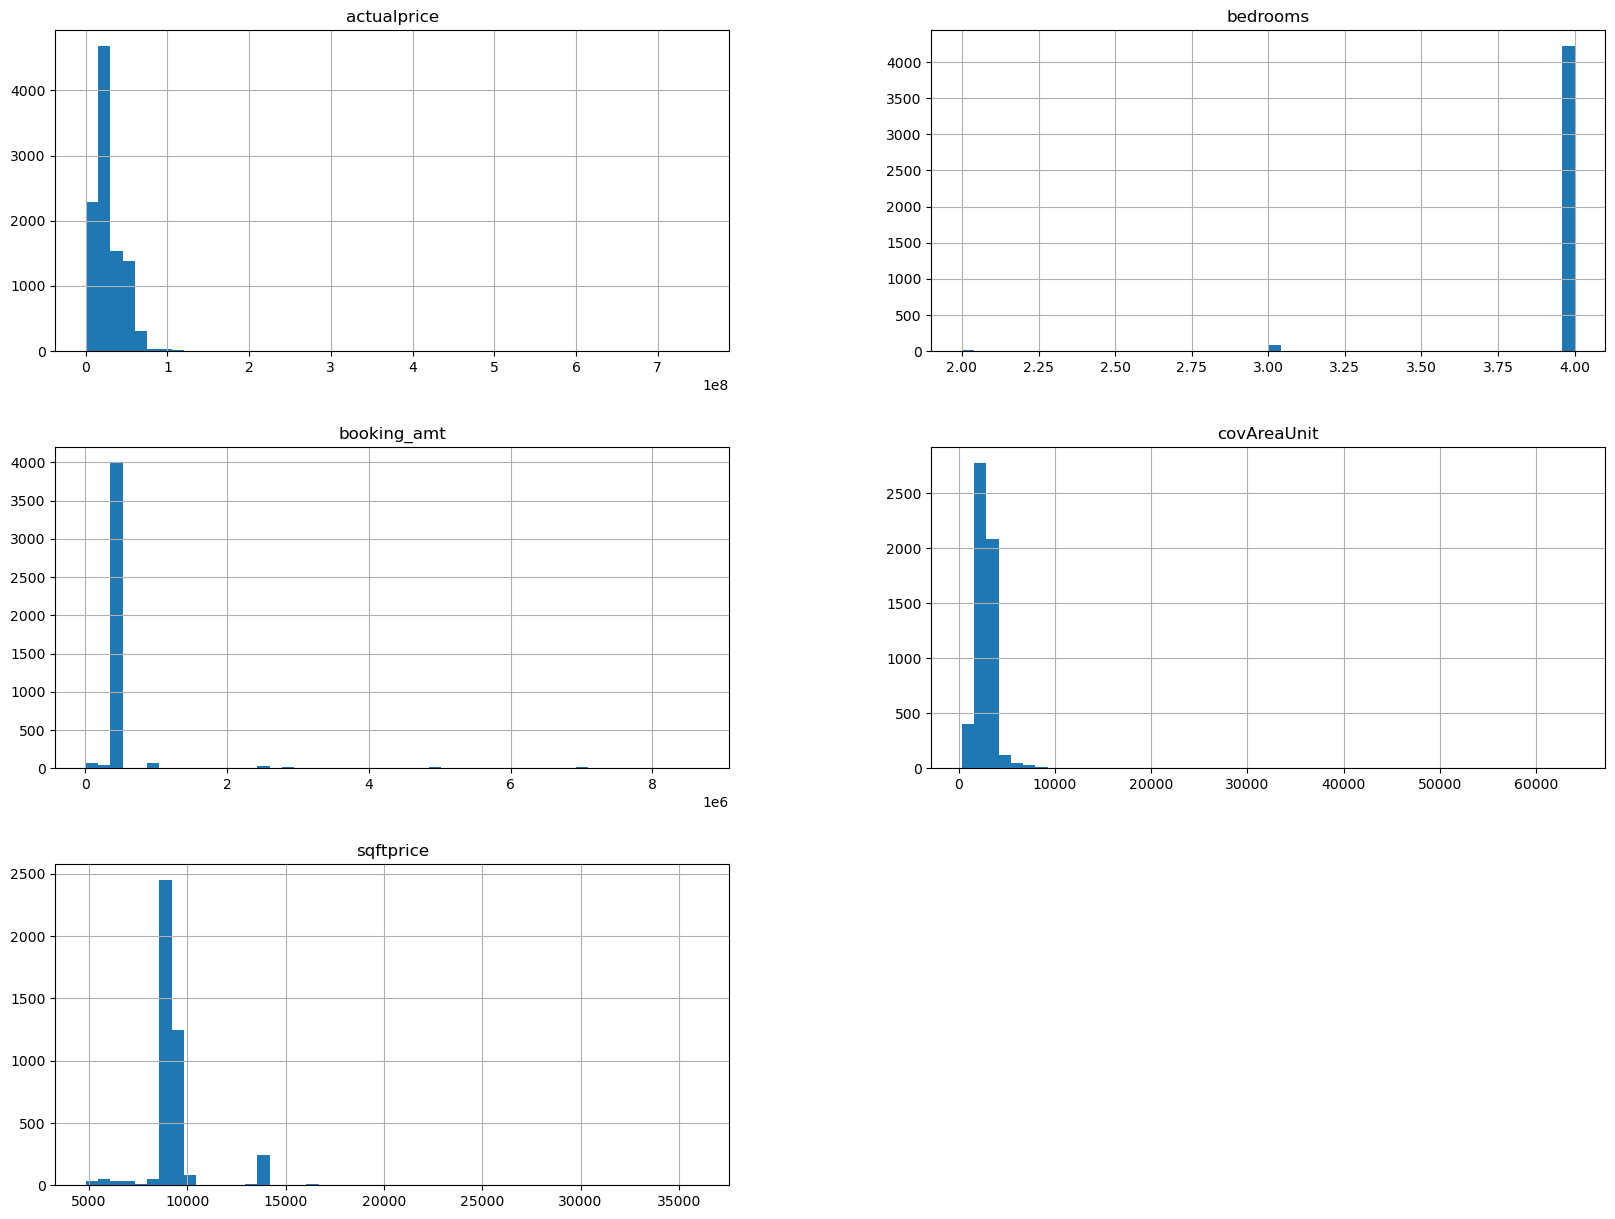

In [434]:
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [448]:
median=df3["bedrooms"].median()# Assuming df3 is your DataFrame and median is the value you want to fill NaN with
df3['bedrooms'] = df3['bedrooms'].fillna(median)
median1=df3["covAreaUnit"].median()# Assuming df3 is your DataFrame and median is the value you want to fill NaN with
df3['covAreaUnit'] = df3['covAreaUnit'].fillna(median1)
median2=df3["sqftprice"].median()# Assuming df3 is your DataFrame and median is the value you want to fill NaN with
df3['sqftprice'] = df3['sqftprice'].fillna(median2)


df3.head()

,actualprice,amenities,auto_des,bedrooms,booking_amt,covAreaUnit,landmarks,locality,sqftprice
0,28764288,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Budigere...",4.0,500000.0,2500.0,"Channasandra Main Road, Nagondanahalli",NaN,8862.0
1,28240000,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Devanaha...",4.0,500000.0,2500.0,"Channasandra Main Road, Nagondanahalli",NaN,8862.0
2,12500000,"Town House,Large Clubhouse ,Air Conditioned,La...","3 BHK, Villa is available for Sale in Kanakapu...",4.0,500000.0,2500.0,"Channasandra Main Road, Nagondanahalli",NaN,8862.0
3,27295824,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Sarjapur...",4.0,500000.0,2500.0,"Channasandra Main Road, Nagondanahalli",NaN,8862.0
4,17351475,"Town House,Large Clubhouse ,Air Conditioned,La...","4 BHK, Villa is available for Sale in Whitefie...",4.0,500000.0,2500.0,"Channasandra Main Road, Nagondanahalli",NaN,8862.0


In [456]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

df4 = df3.drop(["landmarks","amenities"], axis=1)
df4.head()

,actualprice,auto_des,bedrooms,booking_amt,covAreaUnit,locality,sqftprice
0,28764288,"4 BHK, Villa is available for Sale in Budigere...",4.0,500000.0,2500.0,NaN,8862.0
1,28240000,"4 BHK, Villa is available for Sale in Devanaha...",4.0,500000.0,2500.0,NaN,8862.0
2,12500000,"3 BHK, Villa is available for Sale in Kanakapu...",4.0,500000.0,2500.0,NaN,8862.0
3,27295824,"4 BHK, Villa is available for Sale in Sarjapur...",4.0,500000.0,2500.0,NaN,8862.0
4,17351475,"4 BHK, Villa is available for Sale in Whitefie...",4.0,500000.0,2500.0,NaN,8862.0


In [458]:
df4['auto_des'].unique()

array(['4 BHK, Villa is available for Sale in Budigere, Bangalore for 2.8 Crore(s)',
       '4 BHK, Villa is available for Sale in Devanahalli, Bangalore for 2.8 Crore(s)',
       '3 BHK, Villa is available for Sale in Kanakapura Road, Bangalore for 1.2 Crore(s)',
       ...,
       '10 BHK, Residential House is available for Sale in , Bangalore for 2.1 Crore(s)',
       '5 BHK, Residential House is available for Sale in Bilwaradahalli, Bangalore for 62.0 Lac(s)',
       '3 BHK, Residential House is available for Sale in Happy Garden Layout, Bangalore for 85.0 Lac(s)'],
      dtype=object)

In [466]:
import numpy as np

# Ensure df4 and df4['auto_des'] have the necessary columns
df4['bhk'] = df4['auto_des'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and x.split(' ')[0].isdigit() else np.nan)


In [478]:
df4['bhk'].unique()
df4[df4.bhk>10]

,actualprice,auto_des,bedrooms,booking_amt,covAreaUnit,locality,sqftprice,bhk
1308,20000000,1200 Sq-ft Residential House is available for ...,4.0,500000.0,2500.0,NaN,8862.0,1200.0
2413,40000000,1500 Sq-ft Residential House is available for ...,4.0,500000.0,2500.0,NaN,8862.0,1500.0
2758,65000000,4400 Sq-ft Residential House is available for ...,4.0,500000.0,2500.0,NaN,8862.0,4400.0


In [480]:
import numpy as np

# Function to extract the place name after "Sale in"
def extract_place(description):
    if isinstance(description, str) and "Sale in" in description:
        parts = description.split("Sale in")
        if len(parts) > 1:
            place = parts[1].split(',')[0].strip()
            return place
    return np.nan

# Apply the function to the 'auto_des' column
df4['place'] = df4['auto_des'].apply(extract_place)


In [482]:
df4.head()

,actualprice,auto_des,bedrooms,booking_amt,covAreaUnit,locality,sqftprice,bhk,place
0,28764288,"4 BHK, Villa is available for Sale in Budigere...",4.0,500000.0,2500.0,NaN,8862.0,4.0,Budigere
1,28240000,"4 BHK, Villa is available for Sale in Devanaha...",4.0,500000.0,2500.0,NaN,8862.0,4.0,Devanahalli
2,12500000,"3 BHK, Villa is available for Sale in Kanakapu...",4.0,500000.0,2500.0,NaN,8862.0,3.0,Kanakapura Road
3,27295824,"4 BHK, Villa is available for Sale in Sarjapur...",4.0,500000.0,2500.0,NaN,8862.0,4.0,Sarjapura
4,17351475,"4 BHK, Villa is available for Sale in Whitefie...",4.0,500000.0,2500.0,NaN,8862.0,4.0,Whitefield


In [484]:
df4['place'].unique()

array(['Budigere', 'Devanahalli', 'Kanakapura Road', ..., 'MHR Layout',
       'Yadavanahalli', 'Byrathi'], dtype=object)

In [486]:
df4 = df4.drop(["locality"], axis=1)

In [488]:
df4.head()

,actualprice,auto_des,bedrooms,booking_amt,covAreaUnit,sqftprice,bhk,place
0,28764288,"4 BHK, Villa is available for Sale in Budigere...",4.0,500000.0,2500.0,8862.0,4.0,Budigere
1,28240000,"4 BHK, Villa is available for Sale in Devanaha...",4.0,500000.0,2500.0,8862.0,4.0,Devanahalli
2,12500000,"3 BHK, Villa is available for Sale in Kanakapu...",4.0,500000.0,2500.0,8862.0,3.0,Kanakapura Road
3,27295824,"4 BHK, Villa is available for Sale in Sarjapur...",4.0,500000.0,2500.0,8862.0,4.0,Sarjapura
4,17351475,"4 BHK, Villa is available for Sale in Whitefie...",4.0,500000.0,2500.0,8862.0,4.0,Whitefield
